In [1]:
# system libraries
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..', 'src')))

# visualisation libraries
import matplotlib.pyplot as plt

# wordcloud libraries
from PIL import Image
from wordcloud import WordCloud

# data cleaning functions
from data_processing import load_and_clean_survey_data

df = load_and_clean_survey_data('../data/raw/GiG2025_clean.csv')

In [2]:
df.head()

,first_name,last_name,email_id,academic_position,faculty,department,discipline,health_research_keywords,research_methods,research_methods_other,...,health_third_mission,participate_in_kinderuni,participate_in_lndf,outreach_other,collab_fac1,collab_fac2,collab_uni1,collab_uni2,collab_uni3,collab_uni4
0,Giorgia,Silani,giorgia.silani@univie.ac.at,Associate Professor/Ao. Professor,Faculty of Psychology,Department of Clinical and Health Psychology,social neuroscience,"[mental health literacy, emotions, empathy, ne...",mainly quantitative,-99,...,-99,"Yes, please contact me about it","Yes, please contact me about it",-99,Faculty of Computer science,Centre for Sport Science and University Sports,Graz Medical University,University of Salzburg,None,None
1,Laura,König,laura.koenig@univie.ac.at,Full Professor,Faculty of Psychology,Department of Clinical and Health Psychology,Health psychology,"[health promotion, diet, physical activity, se...",mainly quantitative,-99,...,"lay audiences/ general public, e.g. via podcas...",No,"Yes, please contact me about it",-99,Faculty of Social sciences,None,Vienna Medical University,University of Music and Performing Arts in Vienna,None,None
2,Julia,Holzer,julia.holzer@univie.ac.at,Scientific Staff,Faculty of Psychology,Department of Developmental and Educational Ps...,Psychology,"[well-being, motivation, basic psychological n...",both quantitative and qualitative,-99,...,I regularly give talks and workshops for vario...,"Yes, please contact me about it","Yes, please contact me about it",-99,Faculty of Life sciences,None,None,None,None,None
3,Martina,Zemp,martina.zemp@univie.ac.at,Full Professor,Faculty of Psychology,Department of Clinical and Health Psychology,Clinical Child and Adolescent Psychology,"[children, adolescents, families, couples, rel...",mainly quantitative,-99,...,-99,No,No,-99,Centre for Teacher Education,None,Vienna Medical University,None,None,None
4,Valeria,Bordone,valeria.bordone@univie.ac.at,Associate Professor/Ao. Professor,Faculty of Social sciences,Department of Sociology,Sociology,"[Cognition, wellbeing, intergenerational relat...",mainly quantitative,-99,...,-99,"Yes, please contact me about it",No,-99,None,None,None,None,None,None


In [3]:
df['health_research_keywords'] = df['health_research_keywords'].apply(lambda x: [keyword.lower() for keyword in x])

In [4]:
def clean_keyword(keyword):
    if keyword.startswith('and '):
        keyword = keyword[4:]
    if keyword.startswith('healthy '):
        keyword = keyword[7:]
    return keyword

df['health_research_keywords'] = df['health_research_keywords'].apply(lambda x: [clean_keyword(keyword) for keyword in x])

In [5]:
replacements = {
    'aging': 'ageing',
    'AI and health': 'AI',
    'cultural': 'culture',
    'culture notions': 'culture',
    'digital health divide': 'digital health',
    'families': 'family',
    'family formation processes': 'family',
    'global health politics & governance': 'global health',
    'global health security': 'global health',
    'health behaviour': 'health behaviour change',
    'health behaviours': 'health behaviour change',
    'health benefits of sport and exercise': 'sport science',
    'mental health literacy': 'mental health',
    'mental wellbeing': 'mental health',
    'motivation to exercise behavior': 'motivation',
    'music intervention': 'music & health',
    'omics': 'multi-omics',
    'parental leave': 'parenting',
    'psychological determinants': 'psychological',
    'psychological/ psychotherapeutic interventions': 'psychological',
    'psychosocial interventions': 'psychosocial',
    'reproductive health': 'reproductive decisions',
    'school well-being': 'wellbeing',
    'smartphone use': 'social media',
    'social media use': 'social policy',
    'social relationships': 'social policy',
    'social participation': 'social policy',
    'sports injury': 'sport science',
    'teacher well-being': 'wellbeing',
    'well-being': 'wellbeing'
}

df['health_research_keywords'] = df['health_research_keywords'].apply(
    lambda x: [replacements.get(keyword, keyword) for keyword in x]
)

In [6]:
health_keywords_text = ''
for keyword_list in df['health_research_keywords']:
    for keyword in keyword_list:
        health_keywords_text += keyword + ', '
    
print(health_keywords_text)

mental health, emotions, empathy, neurodiversity, schools, autism, health promotion, diet, physical activity, sedentary behaviour, health communication, science communication, psychological, physical environment, research participation effects, digital health, wellbeing, motivation, basic psychological needs, socio-economic disadvantage, science education, science literacy, science outreach, implementation research, programme evaluation, children, adolescents, family, couples, relationships, parenting, adhd, minority stress, resilience, social anxiety, cognition, wellbeing, intergenerational relationships, grandparenthood, family, ageing, working status, environmental attitutes, skeletal muscle, tendon, ageing, strength, fitness, resistance training, sarcopenia, obesity, sport science, overuse syndromes, health governance, vaccination policy, vaccine hesitancy, data governance & politics, evidence & policy, health behaviour change, physical activity,  eating, menstrual health, sleep, o

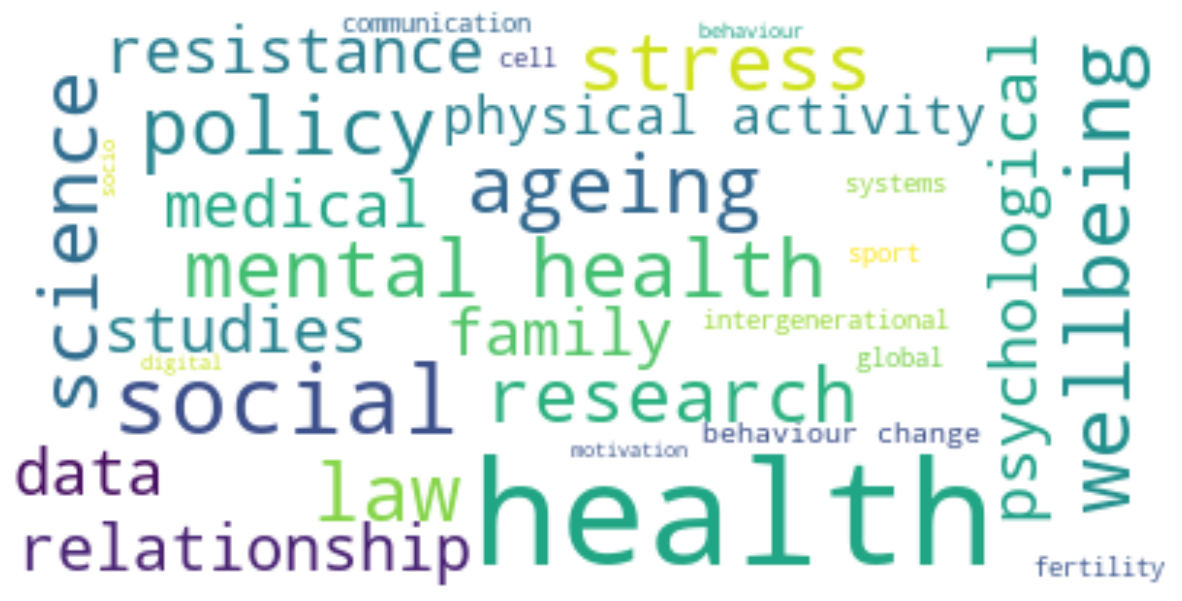

In [15]:
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=30, background_color="white").generate(health_keywords_text)
plt.figure()

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.gcf().set_size_inches(15, 10)
plt.axis("off")
plt.show()

In [8]:
unique_rm_keywords = set([keyword for sublist in df['research_methods_keywords'] for keyword in sublist])
unique_rm_keywords_sorted = sorted(unique_rm_keywords, key=lambda x: x.lower())
unique_rm_keywords_sorted

['(Co-IP',
 '(generalized) linear (mixed) models',
 'accelerometers',
 'action research',
 'activity-based protein profiling',
 'acute and chronic exercise interventions',
 'Administrative data linkage',
 'analysis of positive law',
 'analysis of transference and counter-transference in social science standard methodology (psychodynamic approaches to qualitative reseach)',
 'ANOVA',
 'behavioral',
 'behavioral assessments',
 'behavioral experiments',
 'behavioural experiments',
 'big data',
 'bioassays',
 'C. elegans',
 'Causal inference',
 'Causal Inference',
 'Cell culture',
 'cellular bioenergetics)',
 'chemical probes',
 'Chemoproteomics',
 'ChIP',
 'Chromatography',
 'citizen science',
 'Cognitive measures (Vienna Test System...)',
 'content analysis (qualitative and quantitative)',
 'creative arts-based',
 'daily diary studies',
 'Data-dependent Analysis',
 'Demographic methods',
 'Dietary Interventions',
 'discourse analysis',
 'document analysis',
 'ecological momentary assessm

In [9]:
# resume from here; clean the data properly (aging etc. and then create the wordcloud)

# Flatten the list of lists and get unique items
unique_health_keywords = set([keyword for sublist in df['health_research_keywords'] for keyword in sublist])

unique_health_keywords_sorted = sorted(unique_health_keywords, key=lambda x: x.lower())
unique_health_keywords_sorted

[' ageing',
 ' eating',
 '(health) data reliability',
 'adhd',
 'adolescents',
 'advertising',
 'africa',
 'ageing',
 'ai and health',
 'ai companions',
 'alcohol',
 "alzheimer's disease",
 'antibiotic resistance',
 'attention',
 'autism',
 'bacterial toxins',
 'basic psychological needs',
 'behavior change programs',
 'bioactive natural products',
 'bioanalysis',
 'biodiversity',
 'bioenergetics',
 'biological risks',
 'biological weapons',
 'biosynthetic pathways',
 'biotechnology law',
 'blood',
 'causal inference in demography',
 'cell biology',
 'cellular stress resistance',
 'chemistry of microbial interactions',
 'chemoproteomics',
 'children',
 'cities',
 'cognition',
 'cognitive biases',
 'cognitive functioning',
 'complex systems',
 'couples',
 'creative',
 'culture',
 'data analysis',
 'data governance & politics',
 'data visualization',
 'dementia',
 'diet',
 'dietary pattern',
 'digital health',
 'disconnection',
 'drug discovery',
 'dual-use research',
 'eating behaviour'

remove 'and ' if at the start
remove 'health ' if at the start

aging -> ageing
AI and health -> AI
cultural -> culture
culture notions -> culture
digital health divide -> digital health
families -> family
family formation processes -> family
families -> family
global health politics & governance -> global health
global health security -> global health
health behaviour -> health behaviour change
health behaviours -> health behaviour change
health benefits of sport and exercise -> sport science
mental health literacy -> mental health
mental wellbeing -> mental health
motivation to exercise behavior -> motivation
music intervention -> music & health
omics -> multi-omics
parental leave -> parenting
psychological determinants -> psychological
psychological/ psychotherapeutic interventions -> psychological
psychosocial interventions -> psychosocial
reproductive health -> reproductive decisions
school well-being -> well-being
smartphone use -> social media
social media use -> social policy
social relationships -> social policy
social participation -> social policy
sports injury -> sport science
teacher well-being -> well-being
wellbeing -> well-being

In [10]:
from collections import Counter

# Flatten the list of lists and count the occurrences of each keyword
health_keywords_flat = [keyword for sublist in df['health_research_keywords'] for keyword in sublist]
health_keywords_counter = Counter(health_keywords_flat)

# Display the counter in descending order
health_keywords_counter.most_common()

[('wellbeing', 8),
 ('mental health', 7),
 ('ageing', 6),
 ('stress', 5),
 ('physical activity', 4),
 ('family', 4),
 ('health behaviour change', 4),
 ('social policy', 4),
 ('psychological', 3),
 ('sport science', 3),
 ('global health', 3),
 ('health communication', 2),
 ('digital health', 2),
 ('motivation', 2),
 ('parenting', 2),
 ('resilience', 2),
 ('cognition', 2),
 ('intergenerational relationships', 2),
 ('grandparenthood', 2),
 ('skeletal muscle', 2),
 ('fitness', 2),
 ('sarcopenia', 2),
 ('mindfulness', 2),
 ('fatigue', 2),
 ('music & health', 2),
 ('reproductive decisions', 2),
 ('multi-omics', 2),
 ('culture', 2),
 ('immune cells', 2),
 ('emotions', 1),
 ('empathy', 1),
 ('neurodiversity', 1),
 ('schools', 1),
 ('autism', 1),
 ('health promotion', 1),
 ('diet', 1),
 ('sedentary behaviour', 1),
 ('science communication', 1),
 ('physical environment', 1),
 ('research participation effects', 1),
 ('basic psychological needs', 1),
 ('socio-economic disadvantage', 1),
 ('science

In [11]:
# do the same for the research methods keywords